# CIS 419/519 
#**Homework 3 : Logistic Regression**

In [2]:
import pandas as pd
import numpy as np


### Logistic Regression

In [122]:
class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.theta = initTheta
        self.costList = []
    
    def reset_values(self):
        self.theta = None
        self.costList = []
        
    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        n, d = X.shape
        h_theta = self.sigmoid(np.dot(X, theta))
        h_theta = np.array(h_theta)
        cost = -(np.dot(y.T, np.log(h_theta)) + np.dot((1 - y).T, np.log(1 - h_theta)))
        if self.regNorm is 1:
            regCost = regLambda * sum(abs(theta))
        if self.regNorm is 2:
            regCost = regLambda * ((np.linalg.norm(theta)) ** 2)
        return cost + regCost

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        h_theta = self.sigmoid(np.dot(X, theta))
        #print('The h_theta is: ', h_theta)
        n, d = X.shape
        gradient = np.zeros((d,1))
        h_theta = np.array(h_theta)
        gradient[0,0] = sum(h_theta - y) # no regularization for the x_i0
        for j in range(d-1):
            if self.regNorm is 1:
                gradient[j+1,0] = np.dot(X[:,j+1].reshape((1,n)), (h_theta - y)) + regLambda * ( theta[j+1, 0] / abs(theta[j+1, 0]) )
            if self.regNorm is 2:
                gradient[j+1,0] = np.dot(X[:,j+1].reshape((1,n)), (h_theta - y)) + regLambda * theta[j+1, 0]
        #print('gradient: ', gradient)
        return gradient
        

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        
        n, d = X.shape
        y = y.to_numpy()
        y = y.reshape(n, 1)
        
        # start doing gradient descent
        if self.theta is None:
            #self.theta = np.matrix(np.zeros((d,1))) #np.zeros(d)
            self.theta = np.matrix(np.random.rand(d, 1) - 0.5)

        
        count = 0
        self.costList.append((None, 100)) # assign a large dummy theta and assign None to cost as the starter 
        while not self.hasConverged(self.theta, self.costList[count][1]):
            self.costList.append( (self.computeCost(self.theta, X, y, self.regLambda), self.theta) )
            count = count + 1
            #print("Iteration: ", count, " Cost: ", self.costList[count][0], " Theta.T: ", self.theta.T)
            self.theta = self.theta - self.alpha * self.computeGradient(self.theta, X, y, self.regLambda)
            #print('the maxNumInters is: ', self.maxNumIters, ' the count is: ', count)
            if count > self.maxNumIters:
                break
            


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        prob = self.predict_proba(X)
        label = pd.DataFrame((prob >= 0.5))
        return label

    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        n, d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        prob = pd.DataFrame(self.sigmoid(np.dot(X, self.theta)))
        return prob
    
    def hasConverged(self, theta, prevTheta):
        running_epsilon = np.linalg.norm( theta - prevTheta)
        #print('The convergence now is: ', running_epsilon)
        return (running_epsilon < self.epsilon)


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        threshold_upper = 30
        threshold_lower = -30
        Z[Z > threshold_upper] = threshold_upper
        Z[Z < threshold_lower] = threshold_lower
        #print('sigmoid value: ', 1/(1 + np.exp(-Z)))
        return 1/(1 + np.exp(-Z))

# Test Logistic Regression 1

In [108]:
# Test script for training a logistic regressiom model
#
# This code should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg1():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape
    
    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    regLambda = 50#0.00000001
    regNorm = 1
    logregModel = LogisticRegression(regLambda = regLambda, regNorm = regNorm, epsilon = 0.001)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.savefig('Logreg Decision Boundary with lambda ' + str(regLambda) + ' under L' + str(regNorm))
    plt.show()
    

test_logreg1()

KeyboardInterrupt: 

# Map Feature

In [49]:
def mapFeature(X, column1, column2, maxPower = 6):
    '''
    Maps the two specified input features to quadratic features. Does not standardize any features.
        
    Returns a new feature array with d features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the maxPower polynomial
        
    Arguments:
        X is an n-by-d Pandas data frame, where d > 2
        column1 is the string specifying the column name corresponding to feature X1
        column2 is the string specifying the column name corresponding to feature X2
    Returns:
        an n-by-d2 Pandas data frame, where each row represents the original features augmented with the new features of the corresponding instance
    '''
    X_1_poly = pd.DataFrame(X.iloc[:, 0])
    X_2_poly = pd.DataFrame(X.iloc[:, 1])
    i, j = X.shape
    for d in range(maxPower-1):
            X_1_poly = pd.concat([X_1_poly, X.iloc[:, 0] * X_1_poly.iloc[:, d]], axis = 1)
            X_2_poly = pd.concat([X_2_poly, X.iloc[:, 1] * X_2_poly.iloc[:, d]], axis = 1)
    X_1_poly = pd.concat([pd.DataFrame(np.ones((i, 1))), X_1_poly], axis = 1)
    
    instance, degree_with_one = X_1_poly.shape
    degree_without_one = degree_with_one - 1
    
    X_mapped = pd.DataFrame()
    X_mapped = pd.concat([X_mapped, X_1_poly], axis = 1)
    
    for d in range(degree_with_one):
        for complement in range(degree_without_one - d):
            X_mapped = pd.concat([X_mapped, X_1_poly.iloc[:, d] * X_2_poly.iloc[:, complement]], axis = 1)
    return X_mapped



# Test Logistic Regression 2

In [56]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg2():

    polyPower = 6

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegressionAdagrad(regLambda = 0.0001, regNorm=1, epsilon=0.001, maxNumIters = 10000)
    logregModel.fit(Xaug,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = mapFeature(allPoints, allPoints.columns[0], allPoints.columns[1], polyPower)
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # standardize data
    
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.savefig('Nonlinear_L1_1e_04')
    plt.show()


    print(str(Z.min()) + " " + str(Z.max()))

test_logreg2()

/Users/guoyongxin/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

# Logistic Regression with Adagrad

In [57]:
class LogisticRegressionAdagrad:

    def __init__(self, alpha = 0.1, regLambda=0.01, regNorm=2, epsilon=0.00001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.theta = initTheta
        self.costList = []
        self.Xi = 1e-05
    
    def reset_values(self):
        self.theta = None
        self.costList = []
    
    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        d = len(X)
        h_theta = self.sigmoid(np.dot(X.reshape((1, d)), theta))
        #h_theta = np.array(h_theta)
        cost = -(np.dot(y.T, np.log(h_theta)) + np.dot((1 - y).T, np.log(1 - h_theta)))
        if self.regNorm is 1:
            regCost = regLambda * sum(abs(theta))
        if self.regNorm is 2:
            regCost = regLambda * ((np.linalg.norm(theta)) ** 2)
        return cost + regCost

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        #h_theta = np.array(h_theta)
        d = len(X)
        h_theta = self.sigmoid(np.dot(X.reshape((1, d)), theta))
        gradient = np.zeros((d,1))
        # compute special case, the first column with x_i0 all being 1
        gradient[0, 0] = h_theta - y # no regularization for the x_i0
        # start compute the rest of columns
        for j in range(d-1):
            if self.regNorm is 1:
                gradient[j+1, 0] = (h_theta - y) * X[j+1] + regLambda * ( theta[j+1]/ abs(theta[j+1] ) )
            if self.regNorm is 2:
                gradient[j+1, 0] = (h_theta - y) * X[j+1] + regLambda * theta[j+1]        
        return gradient
    


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        
        n, d = X.shape
        y = y.to_numpy()
        y = y.reshape(n, 1)
        
        # start doing gradient descent
        if self.theta is None:
            #self.theta = np.matrix(np.zeros((d,1)))  #np.zeros(d)
            self.theta = np.matrix(np.random.rand(d, 1) - 0.5)
        
        
        count = 0
        G = np.zeros((d, 1))
        self.alpha = np.ones((d,1)) * self.alpha
        self.costList.append((None, 100)) # assign a large dummy theta and assign None to cost as the starter 
        allData = np.c_[X, y]
        prev_theta = np.matrix(np.ones((d,1))) # initialize a dummy theta value
        for rep in range(self.maxNumIters):
            np.random.shuffle(allData)
            X = allData[:,:-1]
            y = allData[:,-1]
            for i in range(n):
                G = G + ((self.computeGradient(self.theta, X[i,:], y[i], self.regLambda)).reshape((d,1)))**2
                alpha_t = self.alpha / (np.sqrt(G) + self.Xi) 
                prev_theta = self.theta # store the previous theta values
                self.theta = self.theta - alpha_t * self.computeGradient(self.theta, X[i,:], y[i], self.regLambda)
            count = count + 1
            # print('Iteration ', count, ' theta: ', self.theta.T)
            if self.hasConverged(self.theta, prev_theta):
                break
            
            


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        prob = self.predict_proba(X)
        label = pd.DataFrame((prob >= 0.5))
        return label

    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        n, d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        prob = pd.DataFrame(self.sigmoid(np.dot(X, self.theta)))
        return prob

    def hasConverged(self, theta, prevTheta):
        running_epsilon = np.linalg.norm( self.theta - prevTheta)
        # print('The convergence now is: ', running_epsilon)
        return (running_epsilon < self.epsilon)


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        threshold_upper = 30
        threshold_lower = -30
        Z[Z > threshold_upper] = threshold_upper
        Z[Z < threshold_lower] = threshold_lower
        return 1/(1 + np.exp(-Z))

   

In [111]:
class getOptimalLambda_CV:
    
    def __init__(self, folds, repeats):
        self.folds = folds
        self.repeats = repeats
    
    def get_cvScore(self, logReg_model, X, y):
        """
        input:
        logReg_model: a logistic regression model object
        X: a n X d pandas.dataframe
        y: a n X 1 pandas.series
        """
        #logRegModel = logReg_model(self, regLambda, regNorm, epsilon, maxNumIters = 10000)
        from sklearn.model_selection import RepeatedStratifiedKFold
        random_seed = 42
        rskf = RepeatedStratifiedKFold(n_splits = self.folds, n_repeats = self.repeats,
                                       random_state = random_seed)
        scores = np.zeros(self.folds * self.repeats) # intialize a score array with 0 entries
        times = np.zeros(self.folds * self.repeats)
        # loop through all the trials(repetitions) and all the folds. 
        # Two for loops nested together in fact
        # the dataset gets shuffled before each trial/repetition
        count = 0
        import time
        for train_index, test_index in rskf.split(X, y):
            start_time = time.time()
            X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
            y_train, y_test = y.loc[train_index], y.loc[test_index]
            y_test = pd.DataFrame(y_test)
            logReg_model.reset_values() # reset the model initial parameters
            logReg_model.fit(X_train, y_train)
            y_predict = logReg_model.predict(X_test)
            # calculate the accuracy
            scores[count] = (y_test.to_numpy() == y_predict.to_numpy()).mean()
            times[count] = time.time() - start_time
            #print('---------------------------------------------------------------', scores[count])
            count += 1 # update the counter
        timeScore = times.mean()
        cvScore = scores.mean() # get the mean accuracy
        #print('The score matrix is: ', scores)
        #print('The cv score is: ', cvScore)
        #print('The time score is: ', timeScore, ' in seconds')
        return cvScore
        

In [80]:
# Preprocessing for wdbc.csv
# Load all data tables
baseDir = "" ## TODO: insert path to data file
df_wdbc = pd.read_csv(baseDir+'hw3-wdbc.csv', names = range(31)) # add columns names
y = (df_wdbc.iloc[:, -1] == df_wdbc.iloc[0,-1]).astype('int32') # change the label to binary values
df_wdbc.iloc[:, -1] = y
# # Standardize features
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = df_wdbc.iloc[:,:-1]
X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
df_wdbc.iloc[:,:-1] = X
# # logistic regression with both L1 and L2 regularization
folds = 5
repeats = 3
# logistic regression
print('*************The logreg section:****************')
logregModel = LogisticRegression(alpha = 0.05, regLambda = 1e-02, regNorm = 2, epsilon = 0.006, maxNumIters = 10000, initTheta = None)
cvScoreCalculator = getOptimalLambda_CV(folds, repeats)
X = df_wdbc.iloc[:, :-1]
y = df_wdbc.iloc[:, -1]
cvScores = cvScoreCalculator.get_cvScore(logregModel, X, y)
# logistic regression with adagrad
print('*************The adagrad section:****************')
logregModelAdagrad = LogisticRegressionAdagrad(alpha = 0.05, regLambda = 1e-02, regNorm = 2, epsilon = 0.006, maxNumIters = 10000, initTheta = None)
cvScoreCalculator_adagrad = getOptimalLambda_CV(folds, repeats)
cvScores_adagrad = cvScoreCalculator_adagrad.get_cvScore(logregModelAdagrad, X, y)


*************The logreg section:****************
*************The adagrad section:****************
--------------------------------------------------------------- 0.9824561403508771
--------------------------------------------------------------- 0.9473684210526315
--------------------------------------------------------------- 0.9736842105263158
--------------------------------------------------------------- 0.9649122807017544
--------------------------------------------------------------- 0.9911504424778761
--------------------------------------------------------------- 0.9824561403508771
--------------------------------------------------------------- 0.9824561403508771
--------------------------------------------------------------- 0.9649122807017544
--------------------------------------------------------------- 0.9649122807017544
--------------------------------------------------------------- 0.9734513274336283
--------------------------------------------------------------- 0.92982

In [88]:
# Preprocessing for retinopathy.csv
# Load all data tables
baseDir = "" ## TODO: insert path to data file
df_ret = pd.read_csv(baseDir+'hw3-retinopathy.csv', names = range(20)) # add columns names
# # Standardize features
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = df_ret.iloc[:,:-1]
X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
df_ret.iloc[:,:-1] = X
# # logistic regression with both L1 and L2 regularization
folds = 5
repeats = 3
X = df_ret.iloc[:, :-1]
y = df_ret.iloc[:, -1]
# logistic regression
print('*************The logreg section:****************')
logregModel = LogisticRegression(alpha = 0.001, regLambda = 1e-02, regNorm = 2, epsilon = 0.0006, maxNumIters = 10000, initTheta = None)
cvScoreCalculator = getOptimalLambda_CV(folds, repeats)
cvScores = cvScoreCalculator.get_cvScore(logregModel, X, y)
# # logistic regression with adagrad
print('*************The adagrad section:****************')
logregModelAdagrad = LogisticRegressionAdagrad(alpha = 0.001, regLambda = 1e-02, regNorm = 2, epsilon = 0.0006, maxNumIters = 10000, initTheta = None)
cvScoreCalculator_adagrad = getOptimalLambda_CV(folds, repeats)
cvScores_adagrad = cvScoreCalculator_adagrad.get_cvScore(logregModelAdagrad, X, y)

*************The logreg section:****************
--------------------------------------------------------------- 0.8008658008658008
--------------------------------------------------------------- 0.6956521739130435
--------------------------------------------------------------- 0.7347826086956522
--------------------------------------------------------------- 0.7391304347826086
--------------------------------------------------------------- 0.7347826086956522
--------------------------------------------------------------- 0.6926406926406926
--------------------------------------------------------------- 0.7043478260869566
--------------------------------------------------------------- 0.7478260869565218
--------------------------------------------------------------- 0.7869565217391304
--------------------------------------------------------------- 0.7565217391304347
--------------------------------------------------------------- 0.7316017316017316
--------------------------------------

In [99]:
# Preprocessing for retinopathy.csv
# Load all data tables
baseDir = "" ## TODO: insert path to data file
df_dia = pd.read_csv(baseDir+'hw3-diabetes.csv', names = range(9)) # add columns names
y = (df_dia.iloc[:, -1] == df_dia.iloc[0,-1]).astype('int32') # change the label to binary values
df_dia.iloc[:, -1] = y
# # Standardize features
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = df_dia.iloc[:,:-1]
X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
df_dia.iloc[:,:-1] = X
# # logistic regression with both L1 and L2 regularization
folds = 5
repeats = 3
X = df_dia.iloc[:, :-1]
y = df_dia.iloc[:, -1]
# logistic regression
print('*************The logreg section:****************')
logregModel = LogisticRegression(alpha = 0.001, regLambda = 1e-02, regNorm = 1, epsilon = 0.0001, maxNumIters = 10000, initTheta = None)
cvScoreCalculator = getOptimalLambda_CV(folds, repeats)
cvScores = cvScoreCalculator.get_cvScore(logregModel, X, y)
# logistic regression with adagrad
print('*************The adagrad section:****************')
logregModelAdagrad = LogisticRegressionAdagrad(alpha = 0.001, regLambda = 1e-02, regNorm = 1, epsilon = 0.0001, maxNumIters = 10000, initTheta = None)
cvScoreCalculator_adagrad = getOptimalLambda_CV(folds, repeats)
cvScores_adagrad = cvScoreCalculator_adagrad.get_cvScore(logregModelAdagrad, X, y)


*************The logreg section:****************
--------------------------------------------------------------- 0.7792207792207793
--------------------------------------------------------------- 0.7857142857142857
--------------------------------------------------------------- 0.7922077922077922
--------------------------------------------------------------- 0.7581699346405228
--------------------------------------------------------------- 0.7450980392156863
--------------------------------------------------------------- 0.7142857142857143
--------------------------------------------------------------- 0.7792207792207793
--------------------------------------------------------------- 0.7987012987012987
--------------------------------------------------------------- 0.7450980392156863
--------------------------------------------------------------- 0.7647058823529411
--------------------------------------------------------------- 0.7792207792207793
--------------------------------------

In [140]:
## Preprocessing for wdbc.csv
# Load all data tables
baseDir = "" ## TODO: insert path to data file
df_ret = pd.read_csv(baseDir+'hw3-retinopathy.csv', names = range(20)) # add columns names
# # Standardize features
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = df_ret.iloc[:,:-1]
X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
df_ret.iloc[:,:-1] = X
# # logistic regression with both L1 and L2 regularization
folds = 5
repeats = 3
X = df_ret.iloc[:, :-1]
y = df_ret.iloc[:, -1]
# Building Learning Curve
#maxInter = [1,5,10,20,30,40,50,60,70,80,90,100,150,200,250,270,290,310,500,1000,1500,2000,2500]
maxInter = [1,5,10,20,30,300]
accuracyList_L2 = np.zeros((1, len(maxInter)))
accuracyList_L1 = np.zeros((1, len(maxInter)))
accuracyList_L2_ada = np.zeros((1, len(maxInter)))
accuracyList_L1_ada = np.zeros((1, len(maxInter)))

for index, inter in enumerate(maxInter):
    # logreg L2
#     logregModel_L2 = LogisticRegression(alpha = 0.01, regLambda = 1e-08, regNorm = 2, epsilon = 1e-20, maxNumIters = inter, initTheta = None)
#     cvScoreCalculator_L2 = getOptimalLambda_CV(folds, repeats)
#     cvScores_L2 = cvScoreCalculator_L2.get_cvScore(logregModel_L2, X, y)
#     accuracyList_L2[0,index] = cvScores_L2
#     print(accuracyList_L2)
#     print('*****************************')
    # logreg L1
#     logregModel_L1 = LogisticRegression(alpha = 0.01, regLambda = 1e-08, regNorm = 1, epsilon = 1e-20, maxNumIters = inter, initTheta = None)
#     cvScoreCalculator_L1 = getOptimalLambda_CV(folds, repeats)
#     cvScores_L1 = cvScoreCalculator_L1.get_cvScore(logregModel_L1, X, y)
#     accuracyList_L1[0,index] = cvScores_L1
#     print(accuracyList_L1)
#     print('*****************************')
    # adagrad L2
    logregModel_L2_ada = LogisticRegressionAdagrad(alpha = 0.01, regLambda = 1e-08, regNorm = 2, epsilon = 1e-20, maxNumIters = inter, initTheta = None)
    cvScoreCalculator_L2_ada = getOptimalLambda_CV(folds, repeats)
    cvScores_L2_ada = cvScoreCalculator_L2_ada.get_cvScore(logregModel_L2_ada, X, y)
    accuracyList_L2_ada[0,index] = cvScores_L2_ada
    print(accuracyList_L2_ada)
    print('*****************************')
    # adagrad L1
#     logregModel_L1_ada = LogisticRegressionAdagrad(alpha = 0.01, regLambda = 1e-08, regNorm = 1, epsilon = 1e-20, maxNumIters = inter, initTheta = None)
#     cvScoreCalculator_L1_ada = getOptimalLambda_CV(folds, repeats)
#     cvScores_L1_ada = cvScoreCalculator_L1_ada.get_cvScore(logregModel_L1_ada, X, y)
#     accuracyList_L1_ada[0,index] = cvScores_L1_ada
#     print(accuracyList_L1_ada)
#     print('*****************************')



[[0.55835372 0.         0.         0.         0.         0.        ]]
*****************************
[[0.55835372 0.58670556 0.         0.         0.         0.        ]]
*****************************


KeyboardInterrupt: 

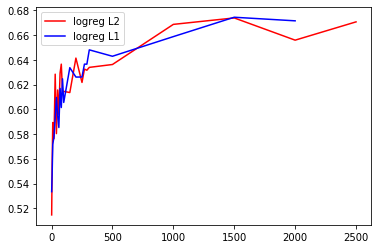

In [146]:
# plot the curve
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
maxInter_L2 = np.array([1,5,10,20,30,40,50,60,70,80,90,100,150,200,250,270,290,310,500,1000,1500,2000,2500])
accuracyList_L2 = np.array([0.51465211, 0.5554351, 0.58936822, 0.57628835, 0.62843466, 0.580394,
  0.61566472, 0.59599222, 0.62926156, 0.63654809, 0.61425936, 0.61453291,
  0.61360813, 0.64144677, 0.62176674, 0.63253906, 0.63162808, 0.63394065,
  0.63626325, 0.66871196, 0.67391806, 0.65594956, 0.67073468])

maxInter_L1 = np.array([1,5,10,20,30,40,50,60,70,80,90,100,150,200,250,270,290,310,500,1000,1500,2000])
accuracyList_L1 = np.array([0.53344752, 0.54818621, 0.57165945, 0.57777778, 0.59307234, 0.6095878,
  0.5948855,  0.58531025, 0.61690319, 0.60148441, 0.62470544, 0.6055863,
  0.63370851, 0.62611456, 0.62614468, 0.63656189, 0.63654683, 0.64810716,
  0.64293243, 0.65881423, 0.67447644, 0.67157789])
plt.plot(maxInter_L2, accuracyList_L2, 'r-', maxInter_L1, accuracyList_L1, 'b-')
plt.legend(['logreg L2','logreg L1'])
plt.savefig('Learning Curve')